# EDA

# Dataset
* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

# 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드

In [2]:
df = pd.read_csv('data/diabetes.csv')
df.shape

(768, 9)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# 결측치 확인
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# 수치데이터 요약확인
df.describe()

# 평균값이 중위값보다 크다는 건 최대값의 영향을 받고있다.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Outcome 컬럼은 label 값이기 떄문에 제외하고
# 학습과 예측에 사용할 컬럼을 만들기
# feature_columns 라는 변수에 담기
feature_columns = df.columns[:-1].tolist()
feature_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

# 결측치 시각화
* 요약된 값에서 최소값이 0이 나오는 경우가 발생
* 0이 나올 수 있는 값도 있지만, 인슐린 혈압 BMI 등의 값은 0값이 결측치로 추측됨
* 따라서 0인 값을 결측치로 처리하고 시각화하기로 결정

In [8]:
cols = feature_columns[1:]
cols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [9]:
# 결측치 여부를 나타내는 데이터프레임을 만들기
# 0값을 결측치라 가정하고 정담(label, target)값을 제외한 컬럼에 대해
# 결측치 여부를 구해서 df_null 이라는 데이터프레임에 담기
df_null = df[cols].replace(0, np.nan)
df_null = df_null.isnull()
df_null.sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [10]:
# 결측치의 비율
df_null.mean()

Glucose                     0.006510
BloodPressure               0.045573
SkinThickness               0.295573
Insulin                     0.486979
BMI                         0.014323
DiabetesPedigreeFunction    0.000000
Age                         0.000000
dtype: float64

<AxesSubplot: >

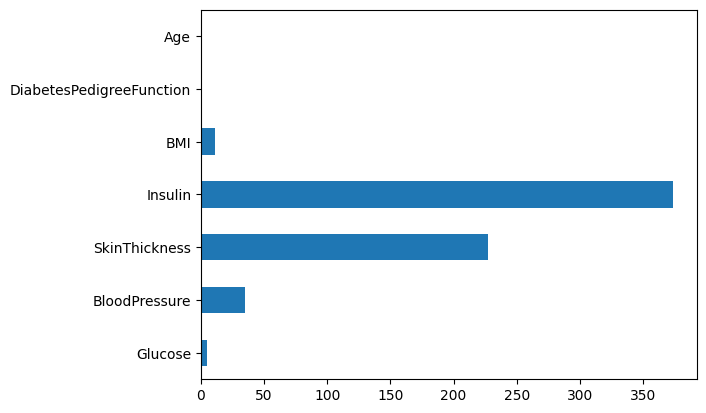

In [11]:
# 결측치의 개수를 구해 막대 그래프로
df_null.sum().plot.barh()

<AxesSubplot: >

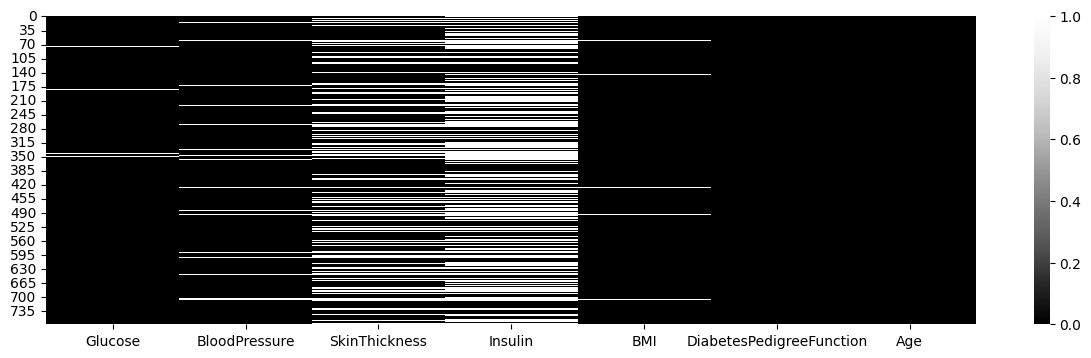

In [12]:
# 결측치를 heatmap으로 표현
plt.figure(figsize=(15,4))
sns.heatmap(df_null, cmap='Greys_r')

# 정답값

In [13]:
# target, label
# 정답값인 Outcome의 개수
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [14]:
# 정답값인 Outcome의 비율
df['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [15]:
# 다른 변수와 함께보기
# 임신횟수와 정답값을 비교
# Pregnancies를 groupby로 그룹화하여 Outcome에 대한 비율을 구하기
# 결과를 df_po라는 변수에 담기
df_po = df.groupby(['Pregnancies'])['Outcome'].agg(['mean','count']).reset_index()
df_po

,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


<AxesSubplot: >

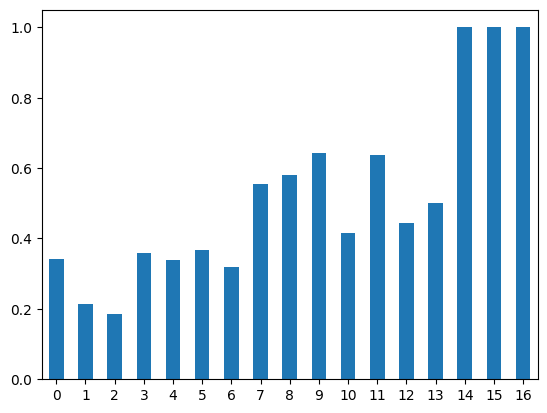

In [16]:
# 임신횟수에 따른 당뇨병 발병비율
df_po['mean'].plot.bar(rot=0)

# Countplot

<AxesSubplot: xlabel='Outcome', ylabel='count'>

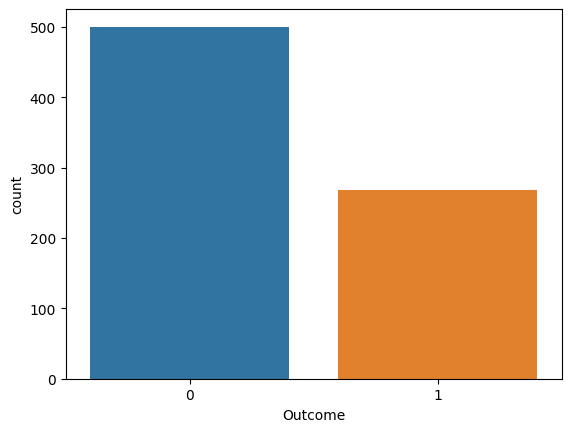

In [17]:
sns.countplot(data=df, x='Outcome')

<AxesSubplot: xlabel='Pregnancies', ylabel='count'>

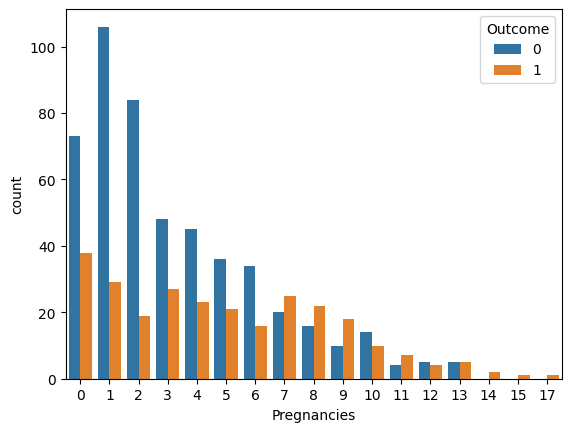

In [18]:
# countplot으로 임신횟수에 따른 당뇨병 발병 비율 구해보기
sns.countplot(data=df, x='Pregnancies', hue='Outcome')

In [19]:
# 임신횟수의 많고 적음에 따라 Pregnancies_high 변수를 만들기
# 수치형 데이터를 범주형 데이터로
df['Pregnancies_high'] = df['Pregnancies'] > 6
df[['Pregnancies', 'Pregnancies_high']].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


<AxesSubplot: xlabel='Pregnancies_high', ylabel='count'>

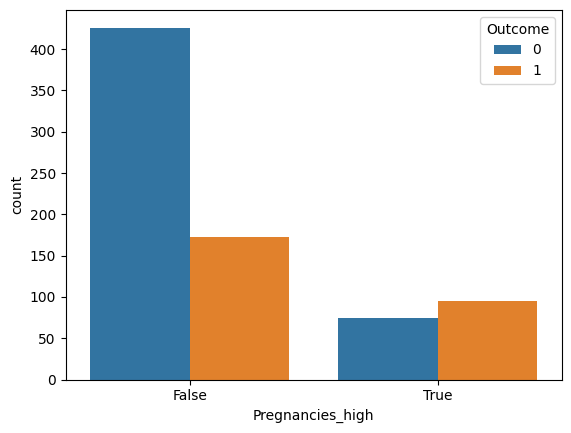

In [20]:
# Pregnancies_high 변수의 빈도수를 countplot으로 그리고
# Outcome 값에 따라 다른 색상으로 표현
sns.countplot(data=df, x='Pregnancies_high', hue='Outcome')

# barplot
* 기본 설정으로 시각화하면 y축에는 평균을 추정해서 그리게 된다.

<AxesSubplot: xlabel='Outcome', ylabel='BMI'>

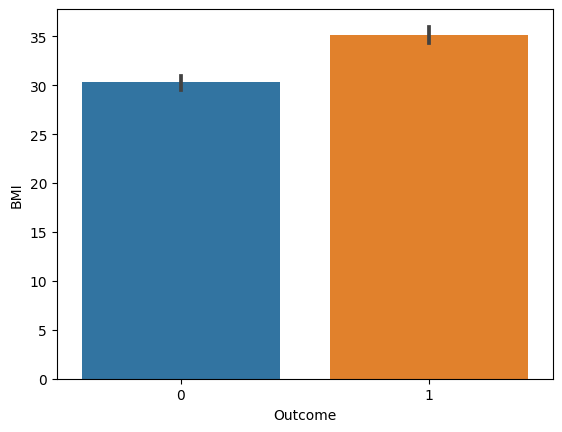

In [21]:
# 당뇨병 발병에 따른 BMI 수치를 비교
sns.barplot(data=df, x='Outcome', y='BMI')

<AxesSubplot: xlabel='Outcome', ylabel='Glucose'>

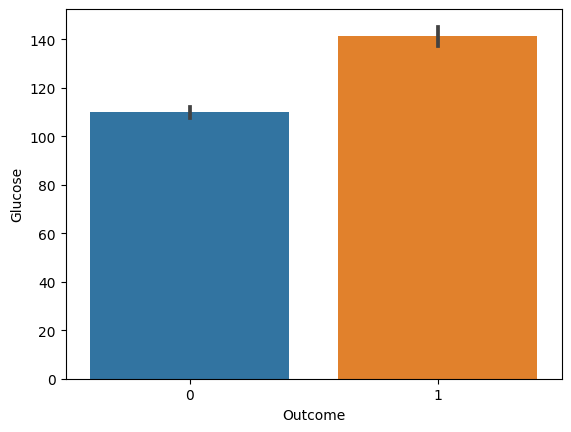

In [22]:
# 당뇨병 발병에 따른 포도당(Glucose)수치를 비교
sns.barplot(data=df, x='Outcome', y='Glucose')

<AxesSubplot: xlabel='Outcome', ylabel='Insulin'>

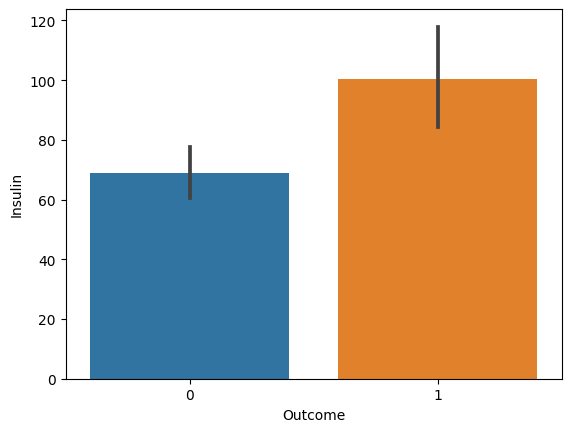

In [23]:
# Insulin 수치가 0 이상인 관측치에서 당뇨병 발병을 비교
sns.barplot(data=df, x='Outcome', y='Insulin')

<AxesSubplot: xlabel='Pregnancies', ylabel='Outcome'>

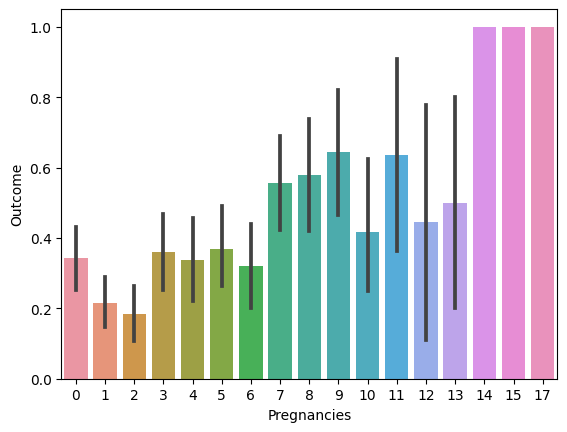

In [24]:
# 임신횟수에 따른 당뇨병 발병비율을 barplot으로 표현
sns.barplot(data=df, x='Pregnancies', y='Outcome')

<AxesSubplot: xlabel='Pregnancies', ylabel='Glucose'>

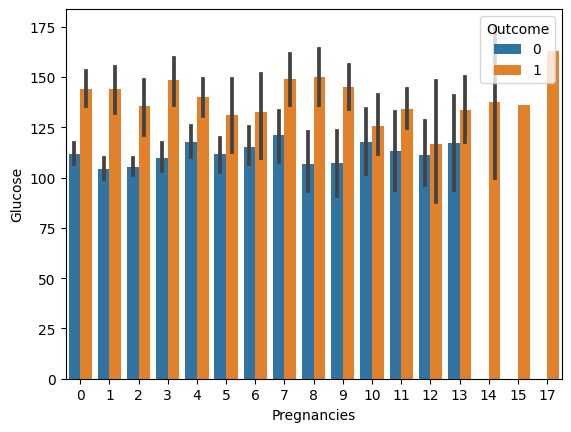

In [25]:
# 임신횟수에 따른 포도당 수치를 당뇨병 발병여부(Outcome)에 따라 barplot으로 표현

sns.barplot(data=df, x='Pregnancies', y='Glucose', hue='Outcome')

<AxesSubplot: xlabel='Pregnancies', ylabel='BMI'>

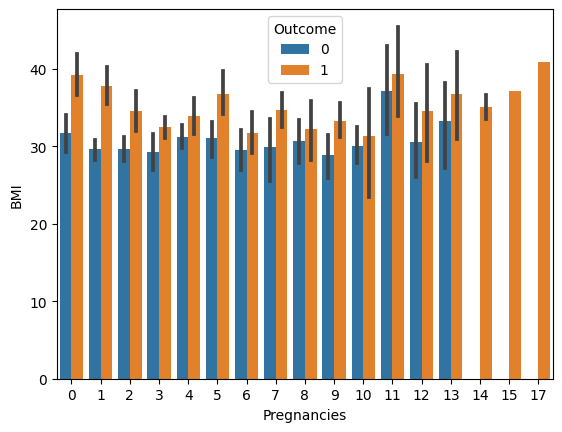

In [26]:
# 임신횟수에 따른 BMI 수치를 당뇨병 발병여부(Outcome)에 따라 barplot으로 표현

sns.barplot(data=df, x='Pregnancies', y='BMI', hue='Outcome')

<AxesSubplot: xlabel='Pregnancies', ylabel='Insulin'>

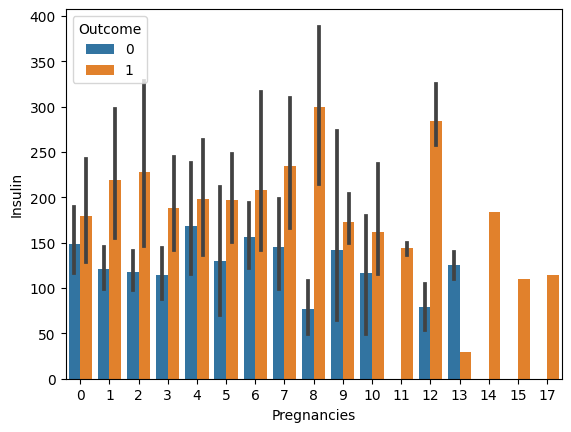

In [27]:
# 임신횟수에 따른 인슐린 수치를 당뇨병 발병여부(Outcome)에 따라 barplot으로 표현
sns.barplot(data=df[df['Insulin'] > 0], x='Pregnancies', y='Insulin', hue='Outcome')

# boxplot

<AxesSubplot: xlabel='Pregnancies', ylabel='Insulin'>

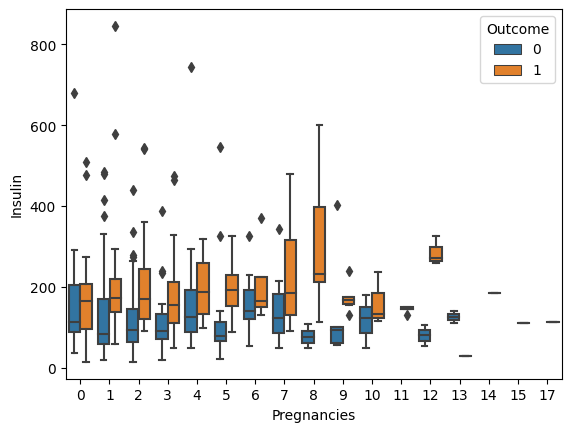

In [28]:
# 임신횟수에 따른 인슐린 수치를 당뇨병 발병여부(Outcome)에 따라 boxplot으로 표현
# df[df['Insulin'] > 0 => 인슐린 값이 0인 경우가 많아 박스플롯이 내려 앉게됨 이를 방지하기 위해
sns.boxplot(data=df[df['Insulin'] > 0], x='Pregnancies', y='Insulin', hue='Outcome')

# violinplot

<AxesSubplot: xlabel='Pregnancies', ylabel='Insulin'>

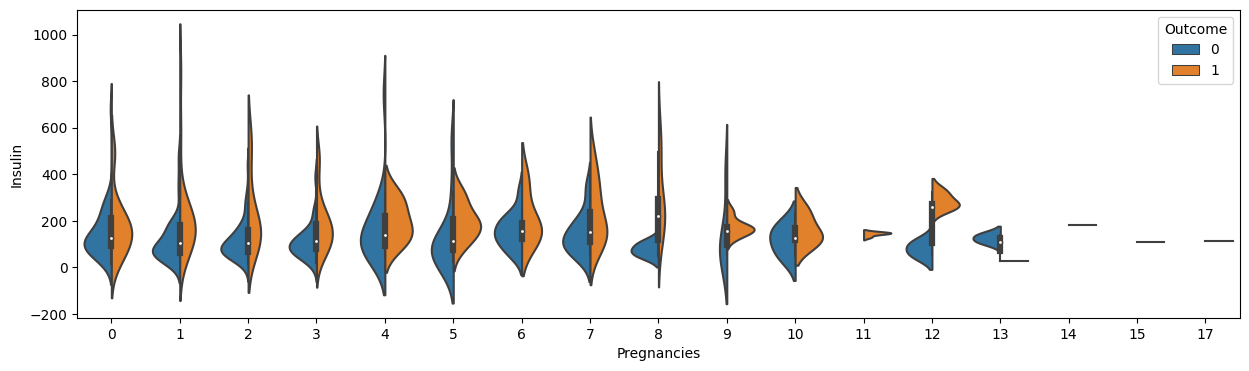

In [29]:
plt.figure(figsize=(15,4))
sns.violinplot(data=df[df['Insulin'] > 0], x='Pregnancies', y='Insulin', hue='Outcome', split=True)

 # swarmplot

In [30]:
# plt.figure(figsize=(10,4))
# sns.swarmplot(data=df[df['Insulin'] > 0], x='Pregnancies', y='Insulin', hue='Outcome')

# distplot
* 하나의 수치형 데이터를 표현할 때

In [31]:
df_0 = df[df['Outcome'] == 0]
df_1 = df[df['Outcome'] == 1]
df_0.shape, df_1.shape

((500, 10), (268, 10))

<AxesSubplot: xlabel='Pregnancies', ylabel='Count'>

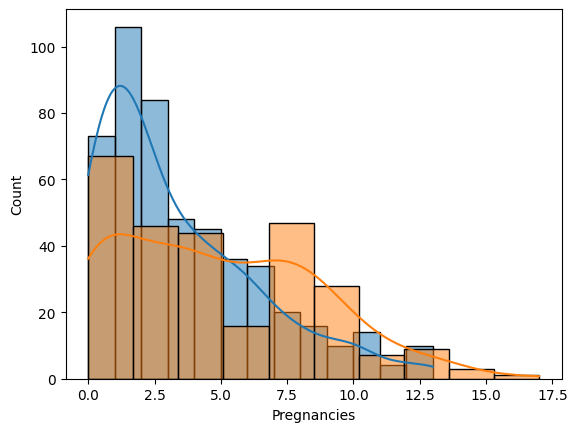

In [32]:
# 임신횟수에 따른 당뇨병 발병 여부를 시각화
sns.histplot(df_0['Pregnancies'], kde=True)
sns.histplot(df_1['Pregnancies'], kde=True)

/var/folders/9s/t04w6g091zlcvn1bbhf9dj040000gn/T/ipykernel_27135/569601667.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0['Age'], hist=False, rug=True, label=0)
/var/folders/9s/t04w6g091zlcvn1bbhf9dj040000gn/T/ipykernel_27135/569601667.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5

<AxesSubplot: xlabel='Age', ylabel='Density'>

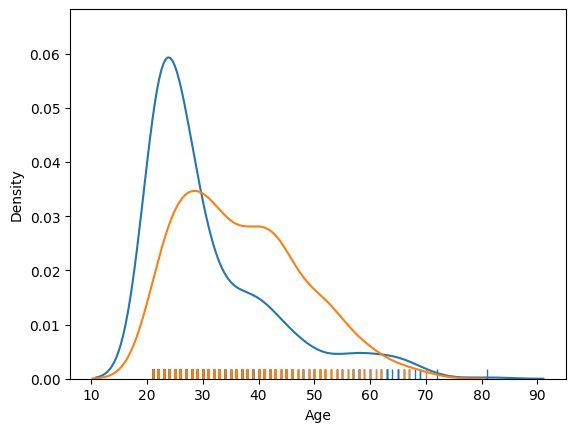

In [33]:
# 나이에 따른 당뇨병 발병 여부를 시각화
sns.distplot(df_0['Age'], hist=False, rug=True, label=0)
sns.distplot(df_1['Age'], hist=False, rug=True, label=1)

# subplot

## pandas histplot

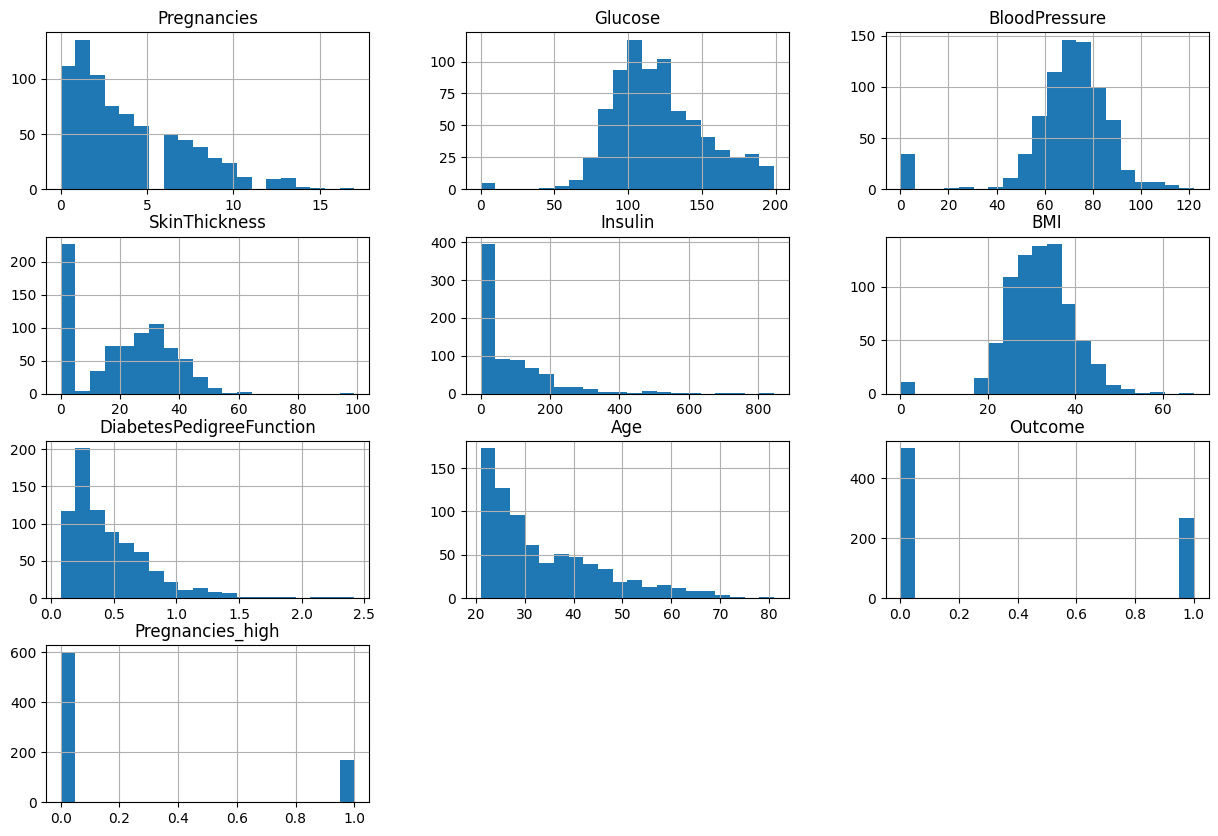

In [34]:
# hist 그래프를 위해 boolean 타입인 변수를 int형으로 변환
df['Pregnancies_high'] = df['Pregnancies_high'].astype(int)
h = df.hist(figsize=(15,10), bins=20)

## 반복문을 통해서 subplot 그리기

### distplot

In [35]:
# 컬럼의 수 만큼 for 문을 만들어서 서브플롯으로 시각화 =
cols = df.columns[:-1].tolist()
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

0 Pregnancies 0 0
1 Glucose 0 1
2 BloodPressure 0 2
3 SkinThickness 1 0
4 Insulin 1 1
5 BMI 1 2
6 DiabetesPedigreeFunction 2 0
7 Age 2 1
8 Outcome 2 2


/var/folders/9s/t04w6g091zlcvn1bbhf9dj040000gn/T/ipykernel_27135/1374638494.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_name], ax=axes[row][col])
/var/folders/9s/t04w6g091zlcvn1bbhf9dj040000gn/T/ipykernel_27135/1374638494.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col_

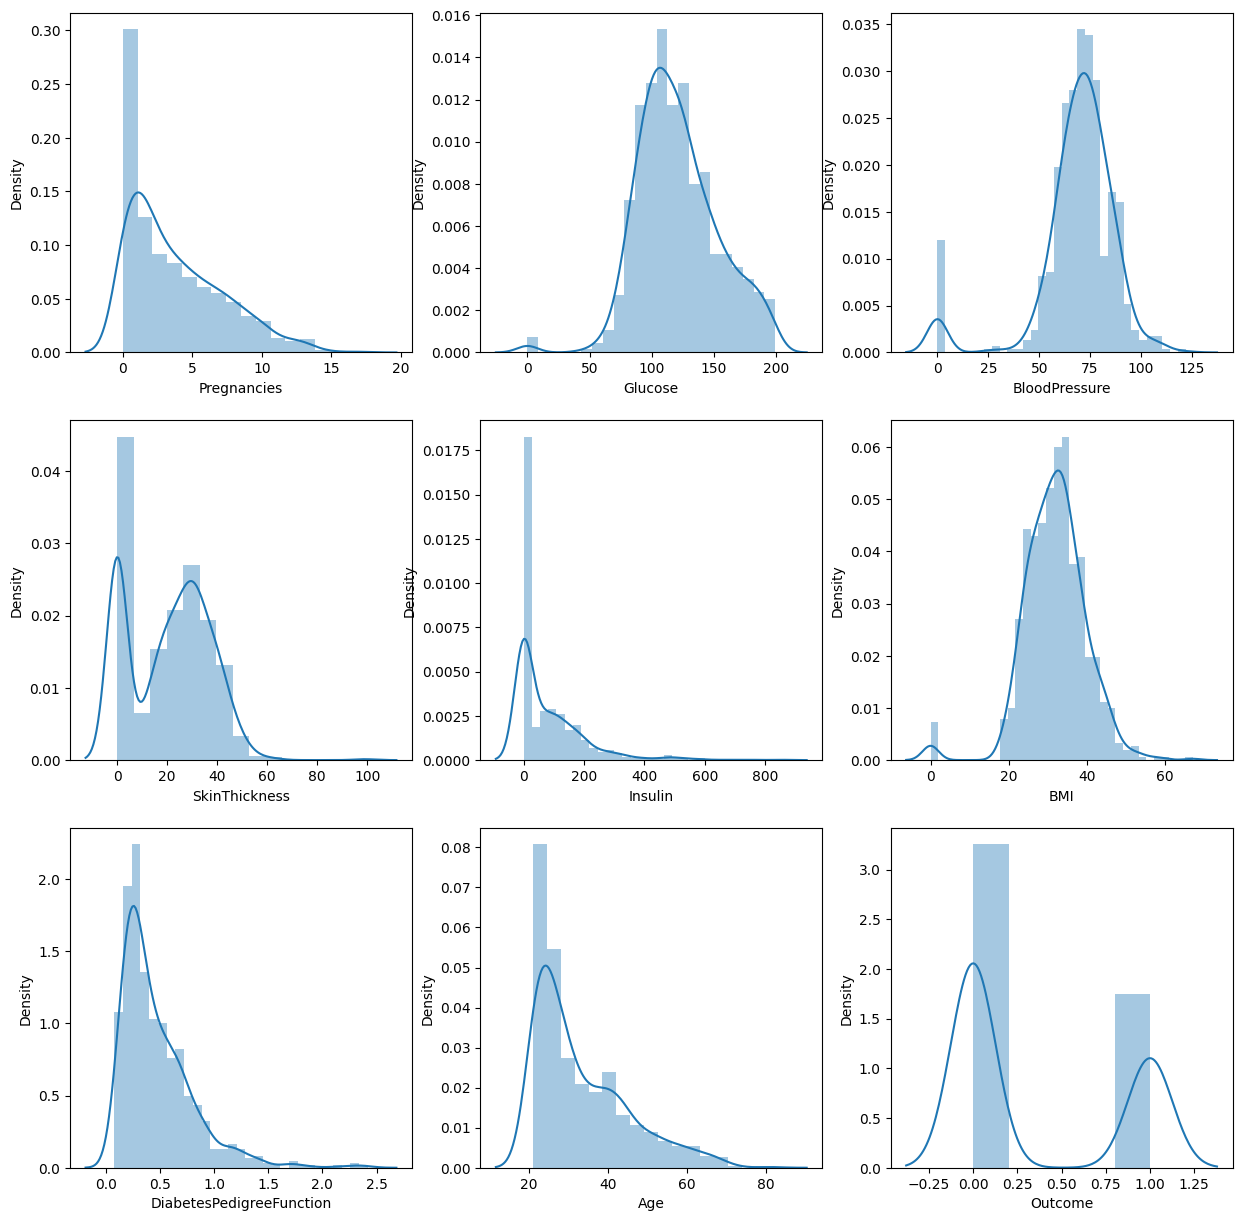

In [36]:
# distplot으로 서브플롯 그리기
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,15))

for i, col_name in enumerate(cols):
    row = i // 3
    col = i % 3
    print(i, col_name, row, col)
    sns.distplot(df[col_name], ax=axes[row][col])

0 Pregnancies 0 0
1 Glucose 0 1
2 BloodPressure 1 0
3 SkinThickness 1 1
4 Insulin 2 0
5 BMI 2 1
6 DiabetesPedigreeFunction 3 0
7 Age 3 1


/var/folders/9s/t04w6g091zlcvn1bbhf9dj040000gn/T/ipykernel_27135/918865549.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_0[col_name] , ax=axes[row][col])
/var/folders/9s/t04w6g091zlcvn1bbhf9dj040000gn/T/ipykernel_27135/918865549.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1[c

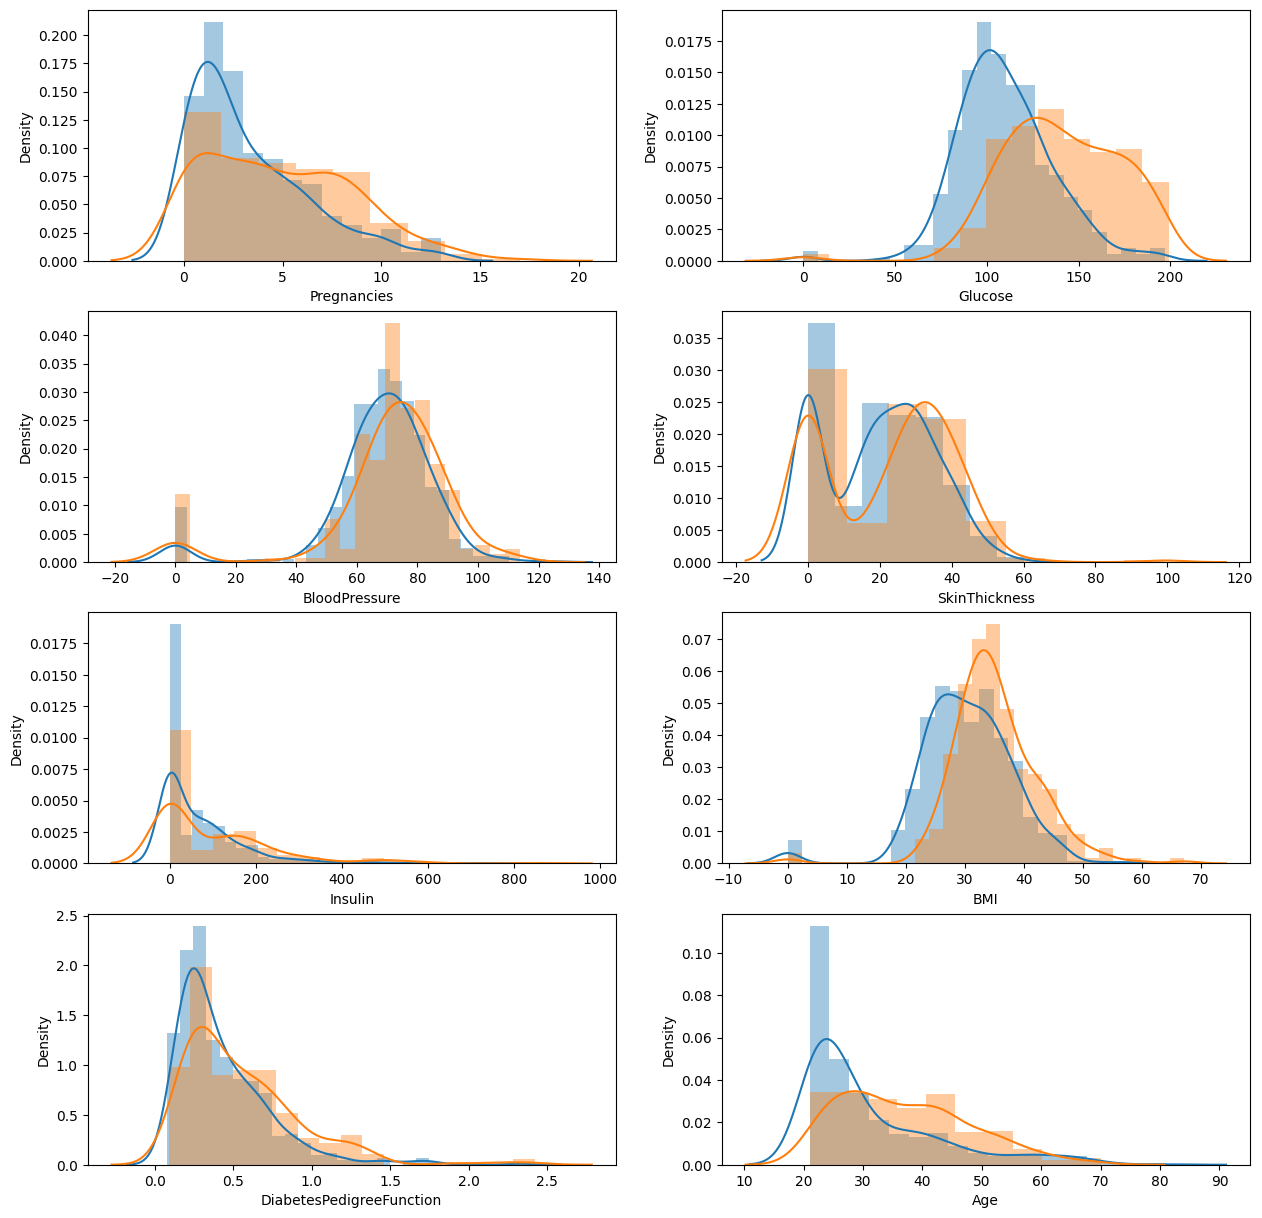

In [37]:
# 모든 변수에 대한 distplot을 그려보기
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15,15))

for i, col_name in enumerate(cols[:-1]):
    row = i // 2
    col = i % 2
    print(i, col_name, row, col)
    sns.distplot(df_0[col_name] , ax=axes[row][col])
    sns.distplot(df_1[col_name] , ax=axes[row][col])

## lmplot
* 상관계수가 높은 Insulin 을 Outcome으로 구분해보기

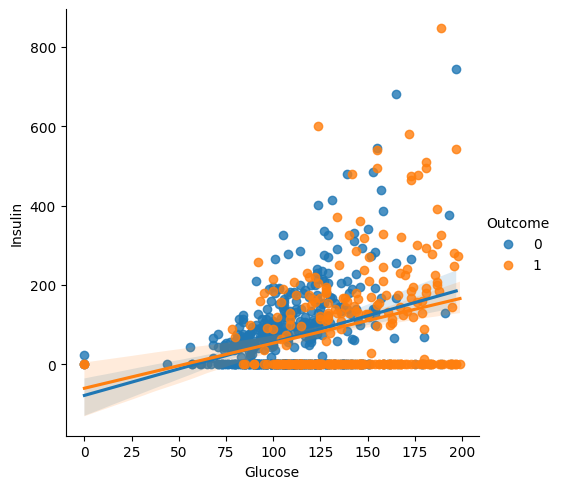

In [39]:
# Glucose 와 Insulin을 Outcome으로 구분
sns.lmplot(data=df, x='Glucose', y='Insulin', hue='Outcome')

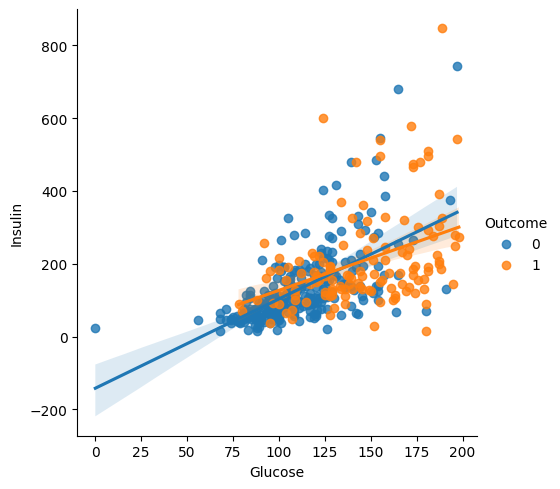

In [40]:
# Insulin > 0 인 데이터로만 그리기
sns.lmplot(data=df[df['Insulin'] > 0], x='Glucose', y='Insulin', hue='Outcome')

## pairplot

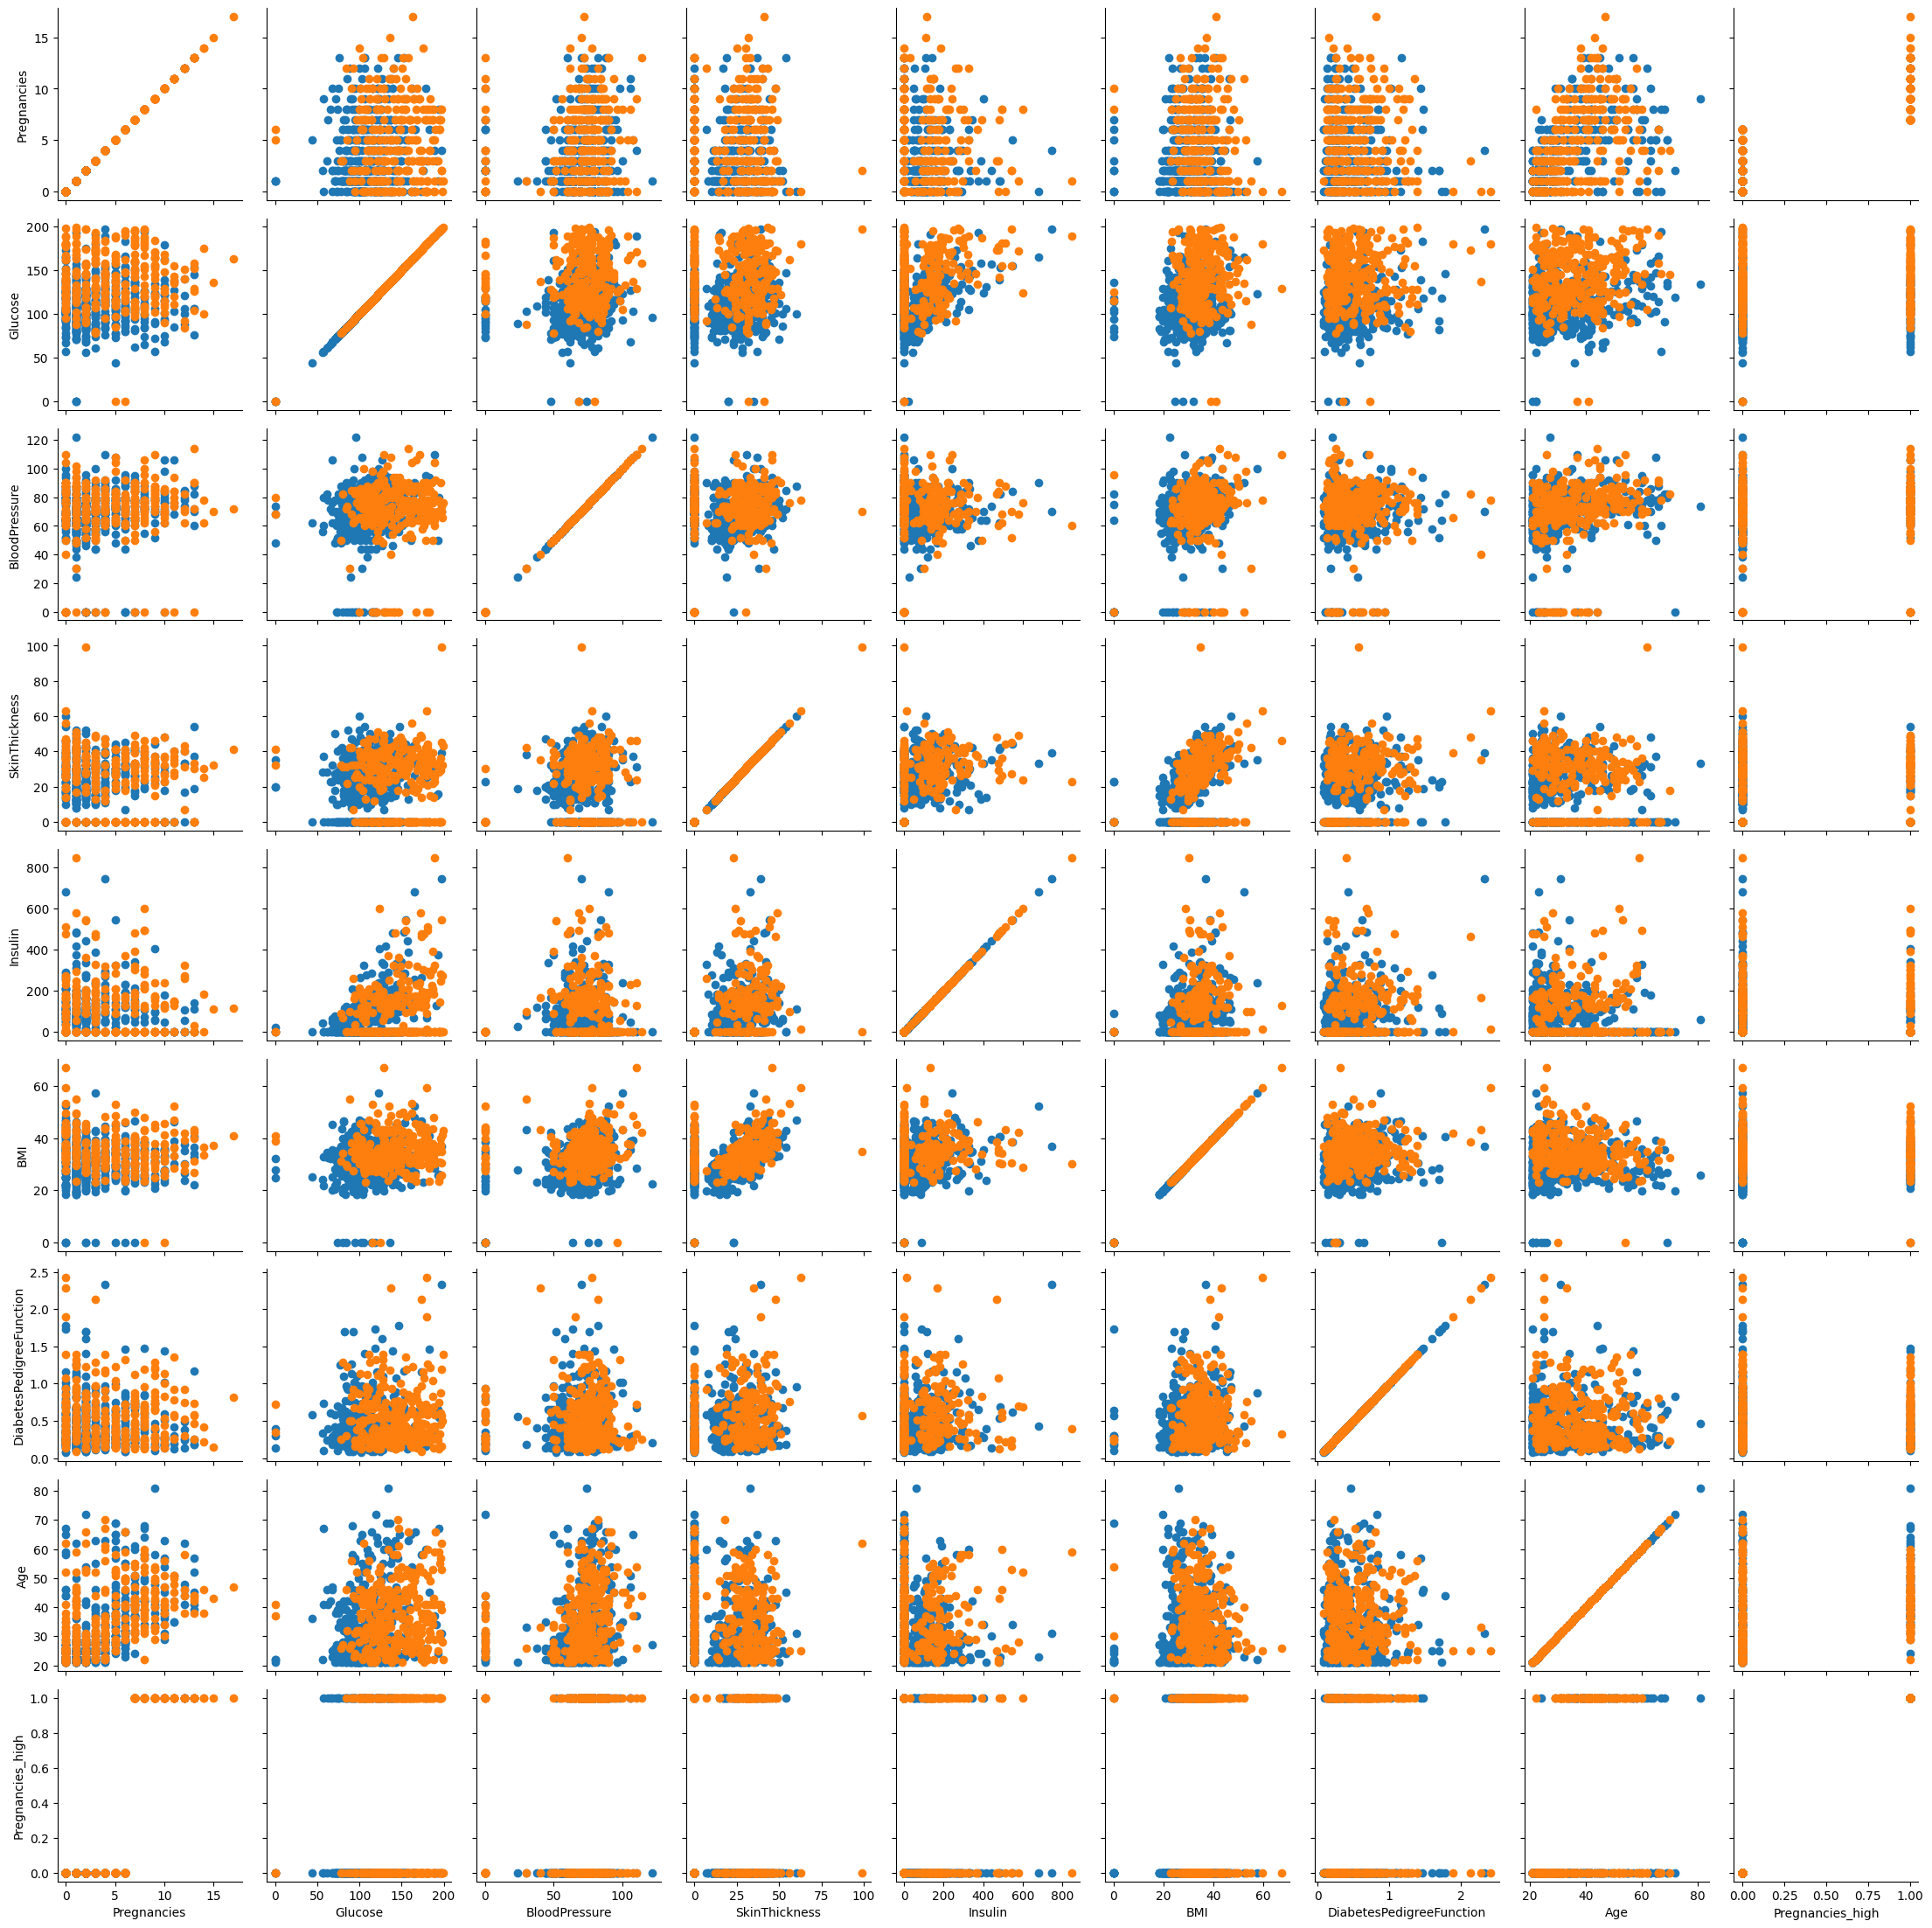

In [42]:
# PairGrid를 통해 모든 변수에 대해 Outcome에 따른 scatterplot을 그려보기
g = sns.PairGrid(df, hue='Outcome')
g.map(plt.scatter)

# 상관분석

<AxesSubplot: >

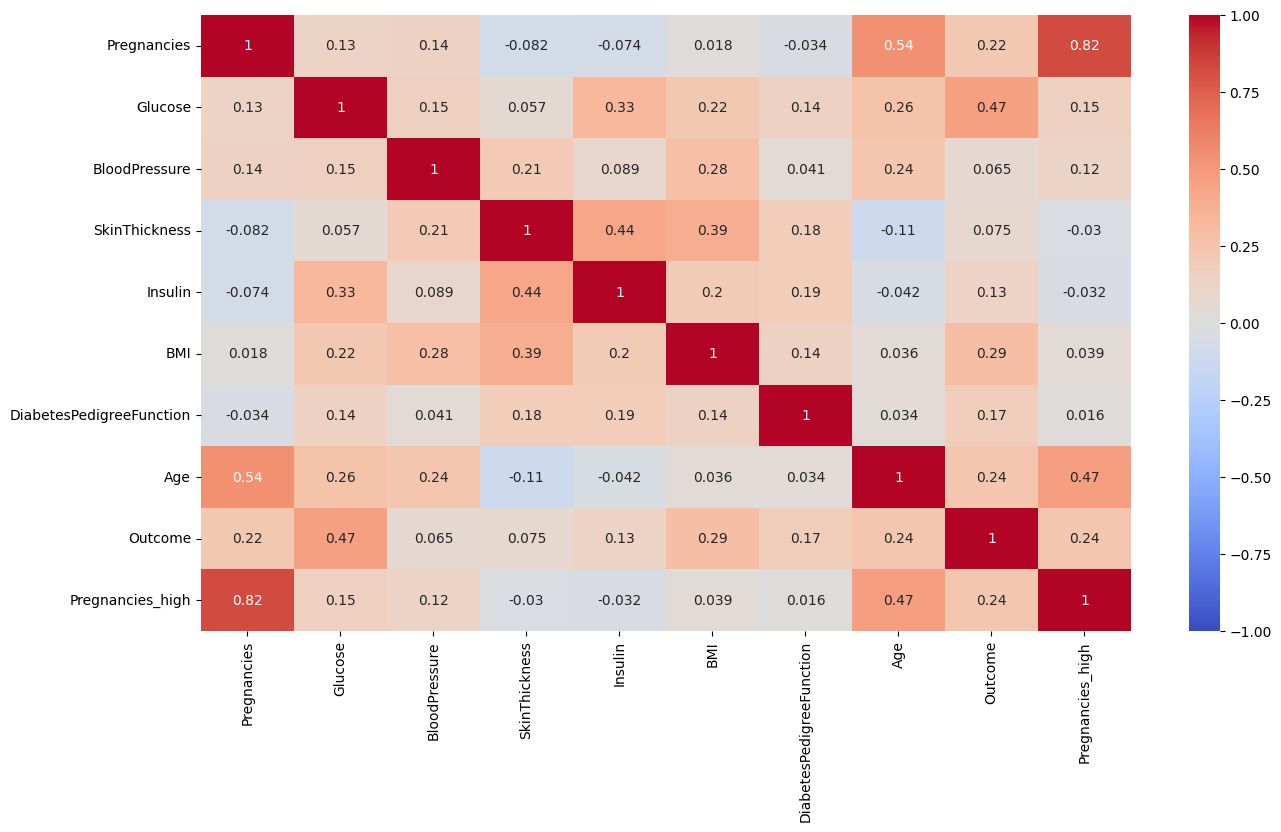

In [51]:
# 상관계수 구하기
# 정답값인 Outcome을 제외하지 않았고, feature로 사용할 컬럼들에 대해 0을 결측치로 만들지 않았음

# 0을 결측치로 처리하지 않는 경우
df_corr = df.corr()
df_corr.style.background_gradient()
# 상관계수를 heatmap으로 시각화
plt.figure(figsize=(15,8))
sns.heatmap(data=df_corr,annot=True, vmax=1, vmin=-1, cmap='coolwarm')

In [56]:
df_matrix = df.iloc[:,:-2].replace(0, np.nan)
df_matrix['Outcome'] = df['Outcome']
df_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47,1


<AxesSubplot: >

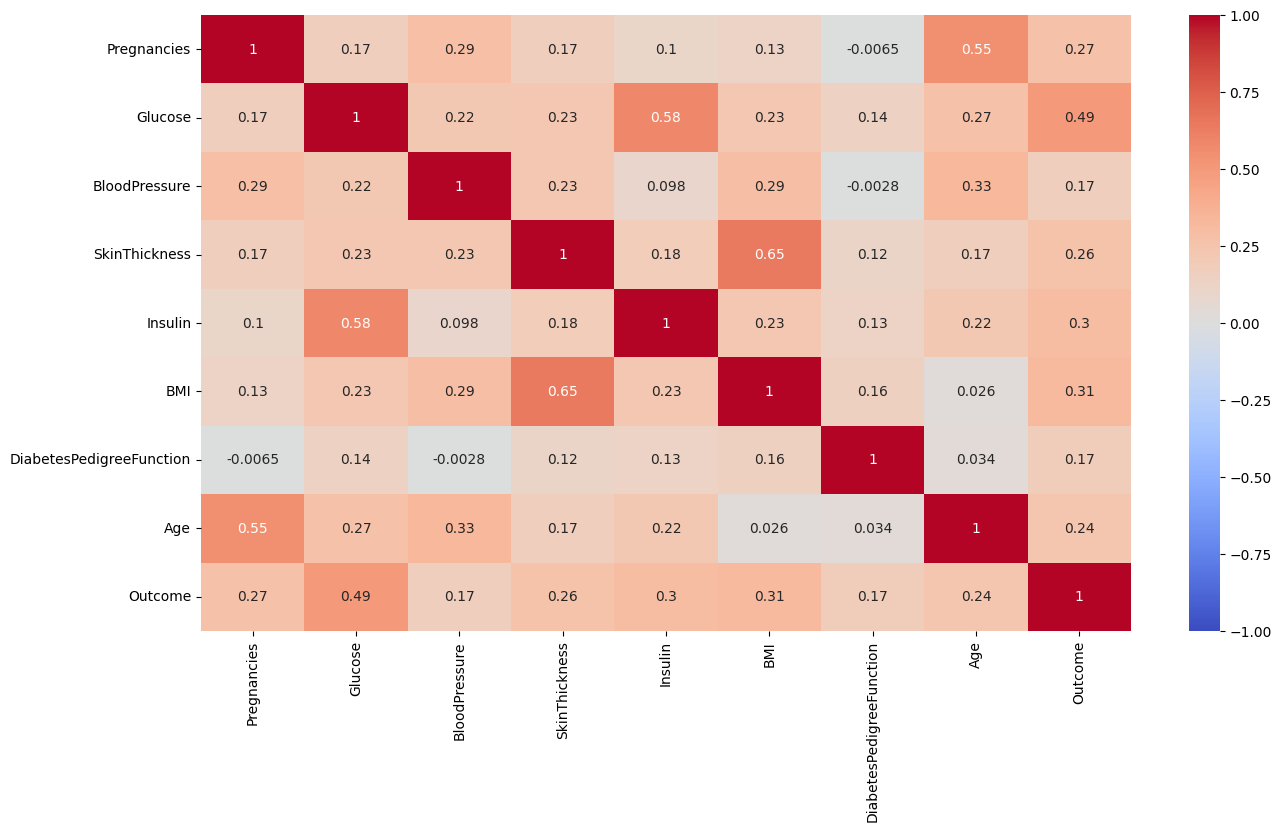

In [62]:
# 정답값인 Outcome을 제외하고feature로 사용할 컬럼들에 대해 0을 결측치로 만들기
# 상관계수 구하기

# 0을 결측치로 처리한경우
df_corr = df_matrix.corr()
df_corr.style.background_gradient()
# 상관계수를 heatmap으로 시각화
plt.figure(figsize=(15,8))
sns.heatmap(data=df_corr,annot=True, vmax=1, vmin=-1, cmap='coolwarm')

In [63]:
# Outcome 수치에 대한 상관관계만 모아서 보기
df_corr['Outcome']

Pregnancies                 0.268218
Glucose                     0.494650
BloodPressure               0.170589
SkinThickness               0.259491
Insulin                     0.303454
BMI                         0.313680
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

## 상관관계가 높은 변수 시각화

<AxesSubplot: xlabel='Insulin', ylabel='Glucose'>

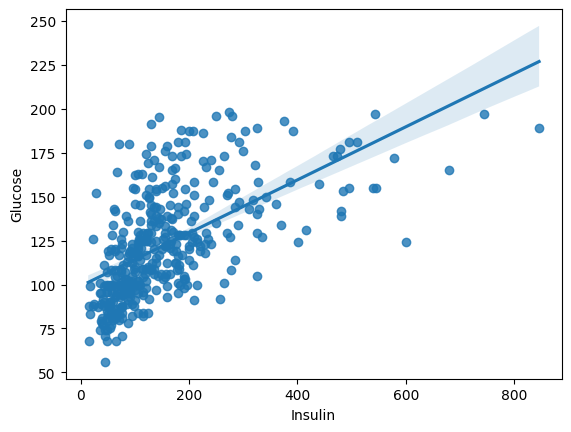

In [64]:
# Insulin과 Glucose를 replot으로
sns.regplot(data=df_matrix, x='Insulin', y='Glucose')

<AxesSubplot: xlabel='Age', ylabel='Pregnancies'>

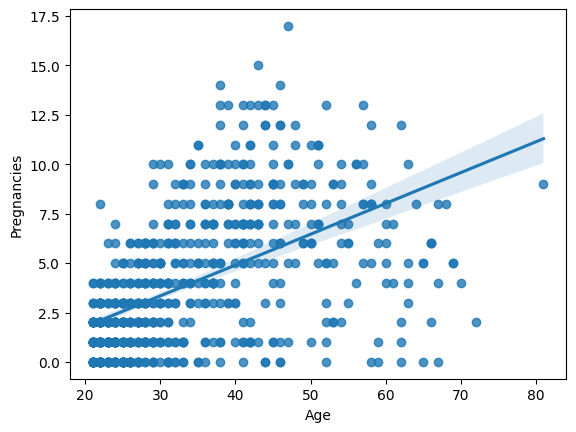

In [65]:
# Age, Pregnancies를 replot으로
sns.regplot(data=df, x='Age', y='Pregnancies')

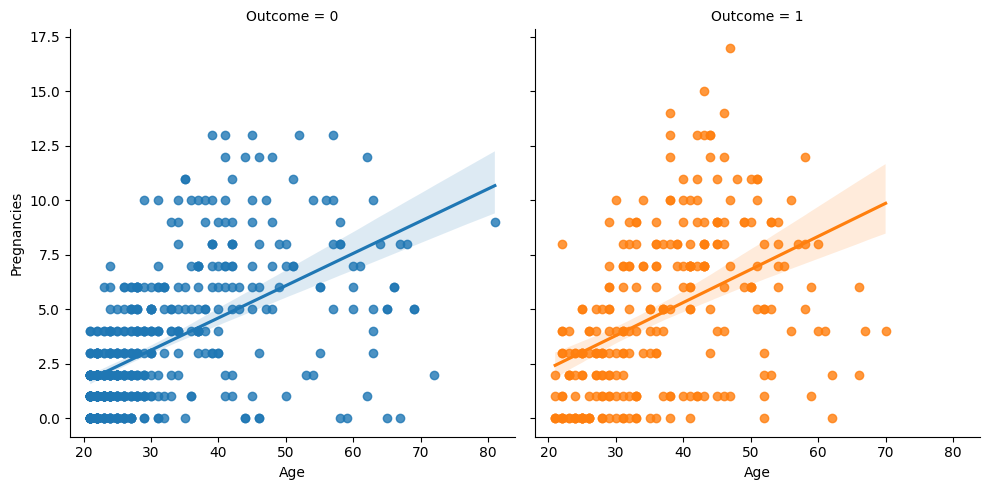

In [67]:
# Age와 Pregnancies 로 lmplot으로 그리고 Outcome에따라 다른 색상으로 표현
sns.lmplot(data=df, x='Age', y='Pregnancies', hue='Outcome', col='Outcome')